In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
dihedrals = scipy.io.loadmat('wB97X/geom.mat', squeeze_me=True)['dihedrals'][:,:,4]

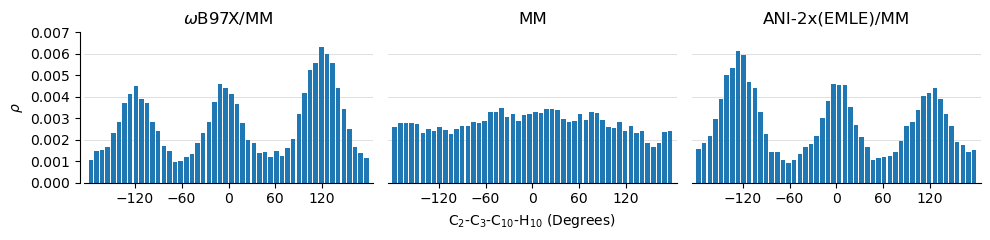

In [3]:
labels = ['$\omega$B97X/MM', 'MM', 'ANI-2x(EMLE)/MM']

fig, axs = plt.subplots(1, 3, figsize=(10, 2.5))
for ax, values, label in zip(axs, dihedrals, labels):
    ax.hist(values, range=(-180, 180), bins=50, density=True, rwidth=0.8)
    ax.set_title(label)
    ax.set_xlim([-185, 185])
    ax.set_xticks(np.arange(-120, 121, 60))
    ax.set_ylim([0, 0.007])
    ax.set_yticks(np.arange(0, 0.008, 0.001))
    for y in (0.002, 0.004, 0.006):
        ax.axhline(y=y, xmin=0, xmax=1, color='lightgrey', 
                   linewidth=0.5, zorder=-1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in axs[1:]:
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)

axs[0].spines['left'].set_position(('data', -190))
axs[0].set_ylabel('$\\rho$')
axs[1].set_xlabel('C$_2$-C$_3$-C$_{10}$-H$_{10}$ (Degrees)')

plt.tight_layout()
plt.savefig('FigS11.png', dpi=300, bbox_inches='tight')